                                                        NEURAL NETWORK LAB FILE


KHUSHI GUPTA

500086354

R2142201601

# **EXPERIMENT 1**

In [ ]:
pip install torch

import torch
torch.empty(3,3)

torch.rand(3,4)

x=torch.tensor([1,2,3])
torch.is_tensor(x)

torch.complex64

torch.float64,torch.float32

torch.tensor([1.2, 3]).dtype

torch.set_default_tensor_type
torch.tensor([1.2, 3]).dtype

torch.set_flush_denormal(True)
torch.tensor([1e-323], dtype=torch.float64)
torch.set_flush_denormal(False)
torch.tensor([1e-323], dtype=torch.float64)

torch.set_printoptions(precision=6)
torch.tensor([1.12345])

torch.set_printoptions(threshold=5)
torch.arange(835)

torch.is_nonzero(torch.tensor([0.1]))

torch.is_nonzero(torch.tensor([1.5]))

torch.is_nonzero(torch.tensor([0.5]))

torch.is_nonzero(torch.tensor([3]))

torch.is_nonzero(torch.tensor([7]))



**EXPERIMENT 2**

In [ ]:
import torch
import sklearn
import pandas as pd

In [ ]:
from sklearn.datasets import make_classification
torch.manual_seed(123)

In [ ]:
## Make a Toy Dataset
X,y=make_classification(n_samples=5000,n_features=4 ,n_classes=2)
### Change it into the Tensor
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)

In [ ]:
### Data Suffling
torch.manual_seed(10)
suffle_idx=torch.randperm(y.size(0),dtype=torch.long)
X,y=X[suffle_idx],y[suffle_idx]
suffle_idx[:10]

tensor([1937, 1091, 4598, 2882, 2376, 4345, 2133, 1355, 2529,  571])

In [ ]:
#### Train Test split
train_size=int(suffle_idx.size(0)*0.7)
train_idx= suffle_idx[:train_size]
test_idx=suffle_idx[train_size:]
X_train,y_train=X[train_idx],y[train_idx]
X_test,y_test=X[test_idx],y[test_idx]

In [ ]:
X_train.shape

torch.Size([3500, 4])

In [ ]:
#### Normalize
mean,std_dev=X_train.mean(dim=0) ,X_train.std(dim=0)
X_train=(X_train-mean)/std_dev
X_test=(X_test-mean)/std_dev

In [ ]:
import torch.nn as nn
from torch.autograd import grad

In [ ]:
class NN():
    def __init__(self,n_features):
        self.n_features=n_features
        self.weight=torch.zeros(size=(n_features,1),dtype=torch.float,requires_grad=True)
        self.bias=torch.zeros(1,dtype=torch.float,requires_grad=True)
    def forward(self,x):
        output=torch.add(torch.mm(x,self.weight),self.bias)
        return output.view(-1)
def loss_fn(yhat,y):
    return torch.mean((yhat-y)**2)

In [ ]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):
    cost=[]
    torch.manual_seed(seed)
    for i in range(n_epoch):
        suffle_idx=torch.randperm(y.size(0))
        batches=torch.split(suffle_idx,bsz)
        for idx in batches:
            ###1. Compute the output
            yhat=model.forward(x[idx])
            ###2. Compute the Error
            loss=loss_fn(yhat,y[idx])
            ###3. Compute the gradient
            grad_w=grad(loss,model.weight,retain_graph=True)[0]
            grad_b=grad(loss,model.bias)[0]
            ###4. Update Model Parameters
            model.weight=model.weight-lr*grad_w
            model.bias=model.bias-lr*grad_b
            ###5. Log and print the loss
        with torch.no_grad():
            yhat=model.forward(x)
            curr_loss=loss_fn(yhat,y)
            print('Epoc: %3d ' % (i+1),end="")
            print('| MSE % .5f' % curr_loss)
            cost.append(curr_loss)
    return cost

In [ ]:
model=NN(X_train.size(1))
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.40382
Epoc:   2 | MSE  0.32921
Epoc:   3 | MSE  0.27447
Epoc:   4 | MSE  0.23392
Epoc:   5 | MSE  0.20372
Epoc:   6 | MSE  0.18111
Epoc:   7 | MSE  0.16415
Epoc:   8 | MSE  0.15141
Epoc:   9 | MSE  0.14180
Epoc:  10 | MSE  0.13459
Epoc:  11 | MSE  0.12916
Epoc:  12 | MSE  0.12509
Epoc:  13 | MSE  0.12202
Epoc:  14 | MSE  0.11971
Epoc:  15 | MSE  0.11796
Epoc:  16 | MSE  0.11665
Epoc:  17 | MSE  0.11566
Epoc:  18 | MSE  0.11492
Epoc:  19 | MSE  0.11437
Epoc:  20 | MSE  0.11395
Epoc:  21 | MSE  0.11363
Epoc:  22 | MSE  0.11339
Epoc:  23 | MSE  0.11322
Epoc:  24 | MSE  0.11308
Epoc:  25 | MSE  0.11298
Epoc:  26 | MSE  0.11290
Epoc:  27 | MSE  0.11285
Epoc:  28 | MSE  0.11280
Epoc:  29 | MSE  0.11277
Epoc:  30 | MSE  0.11275
Epoc:  31 | MSE  0.11273
Epoc:  32 | MSE  0.11271
Epoc:  33 | MSE  0.11270
Epoc:  34 | MSE  0.11270
Epoc:  35 | MSE  0.11269
Epoc:  36 | MSE  0.11268
Epoc:  37 | MSE  0.11268
Epoc:  38 | MSE  0.11268
Epoc:  39 | MSE  0.11268
Epoc:  40 | MSE  0.11268


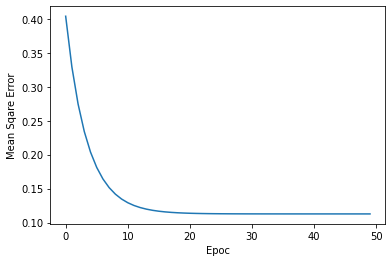

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)),cost)
plt.ylabel('Mean Sqare Error')
plt.xlabel('Epoc')
plt.show()

In [ ]:
ones=torch.ones(y_train.size())
zero=torch.zeros(y_train.size())
train_pred=model.forward(X_train)
train_acc=torch.mean((  
    torch.where(train_pred > 0.5,
                ones,zero).int()==y_train).float())
ones=torch.ones(y_test.size())
zeros=torch.zeros(y_test.size())
test_pred=model.forward(X_test)
test_acc=torch.mean((torch.where(test_pred> 0.5,ones,zeros).int()==y_test).float())
print('Training Accuracy: %.2f' % (train_acc*100))
print('Testing Accuracy: %.2f' % (test_acc*100))

Training Accuracy: 86.89
Testing Accuracy: 86.47


In [ ]:
import torch
import sklearn
import torch.nn.functional as F

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
### Create The dataset
X,y=make_classification(n_samples=1000,n_classes=2,n_features=4)

### Normalize the Data
scaler=StandardScaler()
X=scaler.fit_transform(X)

### Array to Tensor
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=21)
print(X_train.shape)
print(X_test.shape)

torch.Size([700, 4])
torch.Size([300, 4])


In [ ]:
class NNpt(nn.Module):
    def __init__(self,n_features):
        super(NNpt,self).__init__()
        self.linear=nn.Linear(n_features,1)

        self.linear.weight.detach().zero_()
        self.linear.bias.detach().zero_()


    def forward(self,x):
        out=self.linear(x)
        return out.view(-1)

In [ ]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):
    cost=[]
    torch.manual_seed(seed)
    ### Optimizer
    optimizer=torch.optim.SGD(model.parameters(),lr=lr)
    for i in range(n_epoch):
        suffle_idx=torch.randperm(y.size(0))
        batches=torch.split(suffle_idx,bsz)
        for idx in batches:
            ###1. Compute the Output
            yhat=model.forward(x[idx])
            ###2. Compute the Loss
            loss=torch.nn.functional.mse_loss(yhat,y[idx])
            ###3. Compute the Gradients
            optimizer.zero_grad()
            loss.backward()
            ###4. Update the Model Parameters
            optimizer.step()
            #model.weight=model.weight-lr*grad_w
            #model.bias=model.bias-lr*grad_b
            ###5. Log and print the Loss
            with torch.no_grad():
                yhat=model.forward(x)
                curr_loss=loss_fn(yhat,y)
                print('Epoc: %3d ' % (i+1),end="")
                print('| MSE % .5f' % curr_loss)
                cost.append(curr_loss)
    return cost

In [ ]:
n_feature=X_train.size(1)
model=NNpt(n_features=n_feature)

In [ ]:
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.51000
Epoc:   1 | MSE  0.50792
Epoc:   1 | MSE  0.50531
Epoc:   1 | MSE  0.50322
Epoc:   1 | MSE  0.50116
Epoc:   1 | MSE  0.49924
Epoc:   1 | MSE  0.49685
Epoc:   1 | MSE  0.49473
Epoc:   1 | MSE  0.49207
Epoc:   1 | MSE  0.48998
Epoc:   1 | MSE  0.48778
Epoc:   1 | MSE  0.48548
Epoc:   1 | MSE  0.48407
Epoc:   1 | MSE  0.48216
Epoc:   2 | MSE  0.48016
Epoc:   2 | MSE  0.47777
Epoc:   2 | MSE  0.47603
Epoc:   2 | MSE  0.47434
Epoc:   2 | MSE  0.47246
Epoc:   2 | MSE  0.47035
Epoc:   2 | MSE  0.46842
Epoc:   2 | MSE  0.46625
Epoc:   2 | MSE  0.46457
Epoc:   2 | MSE  0.46238
Epoc:   2 | MSE  0.46072
Epoc:   2 | MSE  0.45879
Epoc:   2 | MSE  0.45726
Epoc:   2 | MSE  0.45528
Epoc:   3 | MSE  0.45347
Epoc:   3 | MSE  0.45182
Epoc:   3 | MSE  0.45005
Epoc:   3 | MSE  0.44765
Epoc:   3 | MSE  0.44547
Epoc:   3 | MSE  0.44377
Epoc:   3 | MSE  0.44284
Epoc:   3 | MSE  0.44099
Epoc:   3 | MSE  0.43968
Epoc:   3 | MSE  0.43799
Epoc:   3 | MSE  0.43608
Epoc:   3 | MSE  0.43424


[]

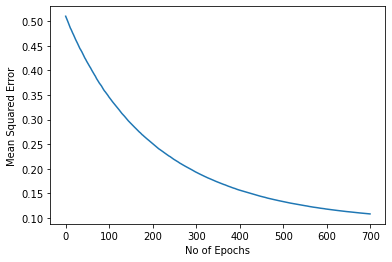

In [ ]:
plt.plot(range(len(cost)),cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()

In [ ]:
ones=torch.ones(y_train.size(0))
zero=torch.zeros(y_train.size(0))
train_pred=model.forward(X_train)
train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y_train).float())
#print(train_acc)
ones=torch.ones(y_test.size(0))
zero=torch.zeros(y_test.size(0))
test_pred=model.forward(X_test)
test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y_test).float())
print('Training Accuracy : %.2f' % train_acc)
print('Testing Accuracy: %.2f' % test_acc)

Training Accuracy : 0.91
Testing Accuracy: 0.89


# **EXPERIMENT 3**

In [ ]:
import torch
import sklearn


In [ ]:
from sklearn.datasets import make_classification
torch.manual_seed(123)

In [ ]:
## Make a Toy Dataset
X,y=make_classification(n_samples=1000,n_features=4 ,n_classes=2)

### Change it into the Tensor
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)





In [ ]:
### Data Suffling
torch.manual_seed(10)
suffle_idx=torch.randperm(y.size(0),dtype=torch.long)
X,y=X[suffle_idx],y[suffle_idx]
suffle_idx[:10]

tensor([937, 859, 548, 487, 148, 190, 199, 632,  33, 714])

In [ ]:
#### Train Test split
train_size=int(suffle_idx.size(0)*0.7)
train_idx= suffle_idx[:train_size]
test_idx=suffle_idx[train_size:]
X_train,y_train=X[train_idx],y[train_idx]
X_test,y_test=X[test_idx],y[test_idx]

In [ ]:
X_train.shape

torch.Size([700, 4])

In [ ]:
X_test.shape

torch.Size([300, 4])

In [ ]:
#### Normalize

mean,std_dev=X_train.mean(dim=0) ,X_train.std(dim=0)
X_train=(X_train-mean)/std_dev
X_test=(X_test-mean)/std_dev

In [ ]:
import torch.nn as nn
from torch.autograd import grad

In [ ]:
class NN():
  def __init__(self,n_features):
    self.n_features=n_features
    self.weight=torch.zeros(size=(n_features,1),dtype=torch.float,requires_grad=True)
    self.bias=torch.zeros(1,dtype=torch.float,requires_grad=True)
  

  def forward(self,x):
    output=torch.add(torch.mm(x,self.weight),self.bias)
    return output.view(-1)

def loss_fn(yhat,y):
  return torch.mean((yhat-y)**2)


In [ ]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:

      ###1. Compute the output
      yhat=model.forward(x[idx])

      ###2. Compute the Error
      loss=loss_fn(yhat,y[idx])

      ###3. Compute the gradient
      grad_w=grad(loss,model.weight,retain_graph=True)[0]
      grad_b=grad(loss,model.bias)[0]

      ###4. Update Model Parameters
      model.weight=model.weight-lr*grad_w
      model.bias=model.bias-lr*grad_b

    ###5. Log and print the loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost




In [ ]:
model=NN(X_train.size(1))
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.48372
Epoc:   2 | MSE  0.46208
Epoc:   3 | MSE  0.44202
Epoc:   4 | MSE  0.42340
Epoc:   5 | MSE  0.40610
Epoc:   6 | MSE  0.38999
Epoc:   7 | MSE  0.37497
Epoc:   8 | MSE  0.36094
Epoc:   9 | MSE  0.34781
Epoc:  10 | MSE  0.33554
Epoc:  11 | MSE  0.32404
Epoc:  12 | MSE  0.31326
Epoc:  13 | MSE  0.30314
Epoc:  14 | MSE  0.29363
Epoc:  15 | MSE  0.28470
Epoc:  16 | MSE  0.27629
Epoc:  17 | MSE  0.26838
Epoc:  18 | MSE  0.26094
Epoc:  19 | MSE  0.25392
Epoc:  20 | MSE  0.24731
Epoc:  21 | MSE  0.24108
Epoc:  22 | MSE  0.23520
Epoc:  23 | MSE  0.22966
Epoc:  24 | MSE  0.22443
Epoc:  25 | MSE  0.21949
Epoc:  26 | MSE  0.21484
Epoc:  27 | MSE  0.21044
Epoc:  28 | MSE  0.20628
Epoc:  29 | MSE  0.20236
Epoc:  30 | MSE  0.19865
Epoc:  31 | MSE  0.19515
Epoc:  32 | MSE  0.19184
Epoc:  33 | MSE  0.18872
Epoc:  34 | MSE  0.18576
Epoc:  35 | MSE  0.18297
Epoc:  36 | MSE  0.18033
Epoc:  37 | MSE  0.17784
Epoc:  38 | MSE  0.17548
Epoc:  39 | MSE  0.17324
Epoc:  40 | MSE  0.17114


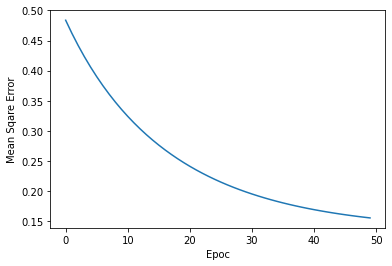

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)),cost)
plt.ylabel('Mean Sqare Error')
plt.xlabel('Epoc')
plt.show()

In [ ]:
ones=torch.ones(y_train.size())
zero=torch.zeros(y_train.size())
train_pred=model.forward(X_train)
train_acc=torch.mean((  
    torch.where(train_pred > 0.5,
                ones,zero).int()==y_train).float())


ones=torch.ones(y_test.size())
zeros=torch.zeros(y_test.size())
test_pred=model.forward(X_test)
test_acc=torch.mean((torch.where(test_pred> 0.5,ones,zeros).int()==y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Testing Accuracy: %.2f' % (test_acc*100))


Training Accuracy: 79.29
Testing Accuracy: 79.00


### Model Using Pytorch

In [ ]:
import torch
import sklearn
import torch.nn.functional as F

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
### Create The dataset
X,y=make_classification(n_samples=1000,n_classes=2,n_features=4)

### Normalize the Data
scaler=StandardScaler()
X=scaler.fit_transform(X)

### Array to Tensor
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=21)
print(X_train.shape)
print(X_test.shape)

torch.Size([700, 4])
torch.Size([300, 4])


In [ ]:
class NNpt(nn.Module):
  def __init__(self,n_features):
    super(NNpt,self).__init__()
    self.linear=nn.Linear(n_features,1)

    self.linear.weight.detach().zero_()
    self.linear.bias.detach().zero_()


  def forward(self,x):
    out=self.linear(x)
    return out.view(-1)



    

In [ ]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)
   ### Optimizer
  optimizer=torch.optim.SGD(model.parameters(),lr=lr)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:
      ###1. Compute the Output
      yhat=model.forward(x[idx])

      ###2. Compute the Loss
      loss=torch.nn.functional.mse_loss(yhat,y[idx])

      ###3. Compute the Gradients
      optimizer.zero_grad()
      loss.backward()

      ###4. Update the Model Parameters
      optimizer.step()

      #model.weight=model.weight-lr*grad_w
      #model.bias=model.bias-lr*grad_b

    ###5. Log and print the Loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost

In [ ]:
n_feature=X_train.size(1)
model=NNpt(n_features=n_feature)


In [ ]:
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.47100
Epoc:   2 | MSE  0.44480
Epoc:   3 | MSE  0.42101
Epoc:   4 | MSE  0.39939
Epoc:   5 | MSE  0.37965
Epoc:   6 | MSE  0.36160
Epoc:   7 | MSE  0.34505
Epoc:   8 | MSE  0.32986
Epoc:   9 | MSE  0.31586
Epoc:  10 | MSE  0.30293
Epoc:  11 | MSE  0.29095
Epoc:  12 | MSE  0.27987
Epoc:  13 | MSE  0.26958
Epoc:  14 | MSE  0.26000
Epoc:  15 | MSE  0.25108
Epoc:  16 | MSE  0.24276
Epoc:  17 | MSE  0.23500
Epoc:  18 | MSE  0.22774
Epoc:  19 | MSE  0.22095
Epoc:  20 | MSE  0.21459
Epoc:  21 | MSE  0.20861
Epoc:  22 | MSE  0.20301
Epoc:  23 | MSE  0.19775
Epoc:  24 | MSE  0.19281
Epoc:  25 | MSE  0.18816
Epoc:  26 | MSE  0.18380
Epoc:  27 | MSE  0.17968
Epoc:  28 | MSE  0.17581
Epoc:  29 | MSE  0.17216
Epoc:  30 | MSE  0.16872
Epoc:  31 | MSE  0.16548
Epoc:  32 | MSE  0.16242
Epoc:  33 | MSE  0.15954
Epoc:  34 | MSE  0.15682
Epoc:  35 | MSE  0.15426
Epoc:  36 | MSE  0.15184
Epoc:  37 | MSE  0.14955
Epoc:  38 | MSE  0.14739
Epoc:  39 | MSE  0.14536
Epoc:  40 | MSE  0.14343


[]

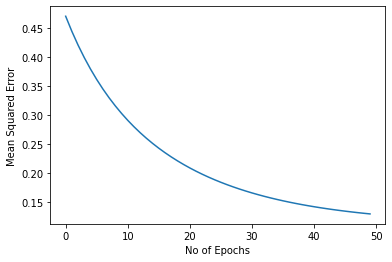

In [ ]:
plt.plot(range(len(cost)),cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()

In [ ]:
ones=torch.ones(y_train.size(0))
zero=torch.zeros(y_train.size(0))
train_pred=model.forward(X_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y_train).float())
#print(train_acc)

ones=torch.ones(y_test.size(0))
zero=torch.zeros(y_test.size(0))
test_pred=model.forward(X_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y_test).float())
print('Training Accuracy : %.2f' % train_acc)
print('Testing Accuracy: %.2f' % test_acc)

Training Accuracy : 0.83
Testing Accuracy: 0.86


### Logistic Regression

In [ ]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)
   ### Optimizer
  optimizer=torch.optim.SGD(model.parameters(),lr=lr)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:
      ###1. Compute the Output
      yhat=model.forward(x[idx])

      ###2. Compute the Loss
      loss=torch.nn.functional.binary_cross_entropy(torch.sigmoid(yhat),y[idx])

      ###3. Compute the Gradients
      optimizer.zero_grad()
      loss.backward()

      ###4. Update the Model Parameters
      optimizer.step()

      #model.weight=model.weight-lr*grad_w
      #model.bias=model.bias-lr*grad_b

    ###5. Log and print the Loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost

In [ ]:
n_feature=X_train.size(1)
model=NNpt(n_features=n_feature)


In [ ]:
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.49174
Epoc:   2 | MSE  0.48387
Epoc:   3 | MSE  0.47638
Epoc:   4 | MSE  0.46926
Epoc:   5 | MSE  0.46250
Epoc:   6 | MSE  0.45610
Epoc:   7 | MSE  0.45003
Epoc:   8 | MSE  0.44430
Epoc:   9 | MSE  0.43889
Epoc:  10 | MSE  0.43380
Epoc:  11 | MSE  0.42902
Epoc:  12 | MSE  0.42453
Epoc:  13 | MSE  0.42033
Epoc:  14 | MSE  0.41642
Epoc:  15 | MSE  0.41278
Epoc:  16 | MSE  0.40941
Epoc:  17 | MSE  0.40630
Epoc:  18 | MSE  0.40344
Epoc:  19 | MSE  0.40083
Epoc:  20 | MSE  0.39846
Epoc:  21 | MSE  0.39632
Epoc:  22 | MSE  0.39441
Epoc:  23 | MSE  0.39272
Epoc:  24 | MSE  0.39124
Epoc:  25 | MSE  0.38997
Epoc:  26 | MSE  0.38890
Epoc:  27 | MSE  0.38803
Epoc:  28 | MSE  0.38735
Epoc:  29 | MSE  0.38686
Epoc:  30 | MSE  0.38655
Epoc:  31 | MSE  0.38641
Epoc:  32 | MSE  0.38645
Epoc:  33 | MSE  0.38665
Epoc:  34 | MSE  0.38701
Epoc:  35 | MSE  0.38753
Epoc:  36 | MSE  0.38821
Epoc:  37 | MSE  0.38903
Epoc:  38 | MSE  0.39000
Epoc:  39 | MSE  0.39111
Epoc:  40 | MSE  0.39235


[]

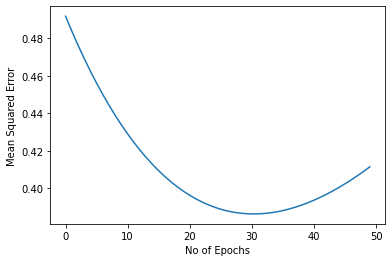

In [ ]:
plt.plot(range(len(cost)),cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()

In [ ]:
ones=torch.ones(y_train.size(0))
zero=torch.zeros(y_train.size(0))
train_pred=model.forward(X_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y_train).float())
#print(train_acc)

ones=torch.ones(y_test.size(0))
zero=torch.zeros(y_test.size(0))
test_pred=model.forward(X_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y_test).float())
print('Training Accuracy : %.2f' % train_acc)
print('Testing Accuracy: %.2f' % test_acc)

Training Accuracy : 0.67
Testing Accuracy: 0.67


# **EXPERIMENT 4**

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [ ]:
# LOADING DATASET

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
len(train_dataset)

60000

In [ ]:
train_dataset[0]

In [ ]:
type(train_dataset[0])

tuple

In [ ]:
# Input Matrix
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

In [ ]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

5

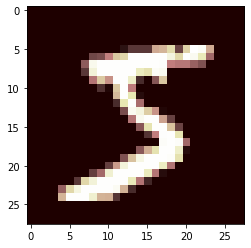

In [ ]:
# plot image of MNIST image
show_img = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='pink')
# Label
train_dataset[0][1]

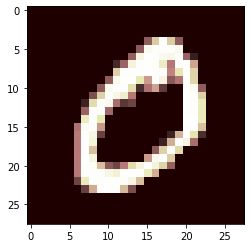

In [ ]:
show_img = train_dataset[1][0].numpy().reshape(28, 28)

plt.imshow(show_img, cmap='pink')

In [ ]:
# Label
train_dataset[1][1]

0

In [ ]:
#Loading MNIST Test Dataset
test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

In [ ]:
len(test_dataset)

10000

In [ ]:
# Image matrix
test_dataset[0][0].size()

torch.Size([1, 28, 28])

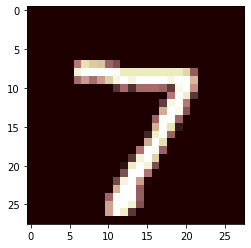

In [ ]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='pink')

In [ ]:
test_dataset[0][1]

7

In [ ]:
len(train_dataset)

60000

In [ ]:
#Epochs
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

In [ ]:
# Training Dataset
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

In [ ]:
# Iterable object
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
img_1 = np.ones((28, 28))
img_2 = np.ones((28, 28))
lst = [img_1, img_2]


In [ ]:
# Same as linear regression! 
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
# Size of images
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [ ]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

In [ ]:
criterion = nn.CrossEntropyLoss()  

In [ ]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
# Type of parameter object
print(model.parameters())

# Length of parameters 
print(len(list(model.parameters())))

# FC 1 Parameters 
print(list(model.parameters())[0].size())

# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

<generator object Module.parameters at 0x7f732c130950>
2
torch.Size([10, 784])
torch.Size([10])


In [ ]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.view(-1, 28*28).requires_grad_()
        labels = labels

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 50. Loss: 2.2776029109954834. Accuracy: 23.600000381469727
Iteration: 100. Loss: 2.1681032180786133. Accuracy: 29.690000534057617
Iteration: 150. Loss: 2.0879557132720947. Accuracy: 36.75
Iteration: 200. Loss: 2.1099560260772705. Accuracy: 44.720001220703125
Iteration: 250. Loss: 2.058457136154175. Accuracy: 49.68000030517578
Iteration: 300. Loss: 1.9882885217666626. Accuracy: 54.540000915527344
Iteration: 350. Loss: 1.9628139734268188. Accuracy: 58.470001220703125
Iteration: 400. Loss: 1.888024926185608. Accuracy: 61.08000183105469
Iteration: 450. Loss: 1.8743160963058472. Accuracy: 63.810001373291016
Iteration: 500. Loss: 1.8470971584320068. Accuracy: 65.83999633789062
Iteration: 550. Loss: 1.759702205657959. Accuracy: 67.56999969482422
Iteration: 600. Loss: 1.7716691493988037. Accuracy: 68.54000091552734
Iteration: 650. Loss: 1.7145787477493286. Accuracy: 69.62000274658203
Iteration: 700. Loss: 1.7381020784378052. Accuracy: 70.41999816894531
Iteration: 750. Loss: 1.624655

In [ ]:
## Printing outputs of our model

iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs)
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
tensor([[-2.9773e-01, -1.2789e+00, -2.9678e-01, -5.9702e-02,  5.4761e-02,
         -4.8911e-01, -1.2526e+00,  2.9037e+00, -2.9954e-01,  9.4135e-01],
        [ 4.9386e-01,  9.9311e-02,  1.5034e+00,  1.1037e+00, -1.5913e+00,
          6.9383e-01,  1.0370e+00, -1.8431e+00,  4.5231e-01, -1.2181e+00],
        [-9.6952e-01,  2.3252e+00,  3.0881e-01,  2.5781e-02, -6.5739e-01,
         -2.5810e-01, -2.1997e-01, -8.1472e-02,  2.0453e-01, -4.5794e-01],
        [ 3.0340e+00, -2.2333e+00, -6.6620e-02, -3.2291e-01, -9.5747e-01,
          5.6449e-01,  1.0160e+00,  4.9546e-01, -4.8597e-01, -1.4857e-01],
        [ 7.3077e-02, -2.0876e+00,  5.0679e-01, -7.7553e-01,  1.7252e+00,
         -2.0075e-01,  1.9720e-01,  2.7617e-01,  1.4703e-02,  7.9522e-01],
        [-1.3797e+00,  2.8877e+00,  2.2887e-01,  1.4964e-01, -7.0382e-01,
         -3.1995e-01, -6.9371e-01,  3.7375e-02,  4.2474e-01, -1.6534e-01],
        [-1.2959e+00, -1.1962e+00, -6.1921e-01,  3.9361e-01,  1.4597e+00,
          1.7101e-01, -5

# **EXPERIMENT 5**

In [ ]:
import torch
from torchvision.datasets import CIFAR10
import torch.nn as nn 
import torch.nn.functional as F 
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchsummary import summary
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tfms=transforms.Compose([transforms.ToTensor()])
train_data=CIFAR10(root='./data',train=True,transform=tfms,download=True)
test_data=CIFAR10(root='./data',train=False,download=True,transform=tfms)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
batch_size=32
lr=.01
karnal_size=3
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
train_loader=DataLoader(train_data,batch_size=batch_size,shuffle=False)
test_loader=DataLoader(test_data,batch_size=batch_size,shuffle=False)

In [ ]:
trainiter=iter(train_loader)
images,labels=trainiter.next()
images.shape

torch.Size([32, 3, 32, 32])

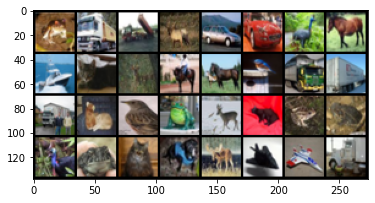

In [ ]:
plt.imshow((make_grid(images).numpy().transpose((1,2,0))))

In [ ]:
def conv_layer(in_channels,out_channels,kernel_size):

    return nn.Sequential(
        nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=kernel_size),
        nn.MaxPool2d(kernel_size=(2,2)),
        nn.ReLU()
    
        )

In [ ]:
class Conv_net(nn.Module):
    def __init__(self):
        super(Conv_net, self).__init__()
        self.layer1=conv_layer(3,16,3)
        self.layer2=conv_layer(16,32,3)
        self.layer3=conv_layer(32,64,3)
        self.flatten=nn.Flatten()
        self.fc1=nn.Linear(64*2*2,50)
        self.fc2=nn.Linear(50,10)
    def forward(self,x):
        x=self.layer1(x)
        x=self.layer2(x)
        x=self.layer3(x)
        x=self.flatten(x)
        x=self.fc1(x)
        x=self.fc2(x)
        return x

In [ ]:
model=Conv_net()
model

Conv_net(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=256, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [ ]:
summary(model=model,input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             448
         MaxPool2d-2           [-1, 16, 15, 15]               0
              ReLU-3           [-1, 16, 15, 15]               0
            Conv2d-4           [-1, 32, 13, 13]           4,640
         MaxPool2d-5             [-1, 32, 6, 6]               0
              ReLU-6             [-1, 32, 6, 6]               0
            Conv2d-7             [-1, 64, 4, 4]          18,496
         MaxPool2d-8             [-1, 64, 2, 2]               0
              ReLU-9             [-1, 64, 2, 2]               0
          Flatten-10                  [-1, 256]               0
           Linear-11                   [-1, 50]          12,850
           Linear-12                   [-1, 10]             510
Total params: 36,944
Trainable params: 36,944
Non-trainable params: 0
---------------------------------

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=lr)

In [ ]:
def train(mode,trainloader,loss_fn=None,optimizer=None,seed=32,EPOCHS=100):
    torch.manual_seed(seed)
    cost=[]
    
    model.to(device)
    for epoch in range(EPOCHS):
        train_corr=[]
        for idx,(img,lbl) in enumerate(trainloader):
            ##1 Compute the Output
            img,lbl=img.to(device),lbl.to(device)
            yhat=model(img)
            
            ##2 Compute the Loss
            loss=loss_fn(yhat,lbl)

            ##3 Compute the gradients
            optimizer.zero_grad()
            loss.backward()

            ##4 update the model parameters
            optimizer.step()
            with torch.no_grad():
                yhat=model(img)
                loss=loss_fn(yhat,lbl)
                core_lbl=(torch.argmax(F.softmax(yhat,dim=1),dim=1)==lbl).sum().item()
                ##print('Model accuracy on this batch %.2f', core_lbl)
                train_corr.append(core_lbl)
        with torch.no_grad():
            acc=sum(train_corr)/len(train_data)*100
            
            print(f'After {epoch+1} Model Training Accuracy {acc}')


   


In [ ]:
len(train_data)

50000

**EXPERIMENT 6**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))

In [ ]:


train_set = 45000
max_len_text = 2000

df['sentiment'] = df['sentiment'].replace('positive', 1)
df['sentiment'] = df['sentiment'].replace('negative', 0)

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review'])
vector = tokenizer.texts_to_sequences(df['review'])

In [ ]:
train_data = np.array(vector)[:train_set]
train_label = (np.array(df['sentiment'])[:train_set])
test_data = np.array(vector)[train_set:]
test_label = (np.array(df['sentiment'])[train_set:])


In [ ]:
padded_train = pad_sequences(train_data, maxlen=max_len_text)
padded_test = pad_sequences(test_data, maxlen=max_len_text)

In [ ]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(13000, 16, input_length=max_len_text))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.2)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit(padded_train, train_label, epochs=4, validation_data=(padded_test, test_label))
